In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
TrafficCounts = pd.read_json("https://data.cityofchicago.org/resource/pfsx-4n4m.json")

In [6]:
tc_head = TrafficCounts.head(5)
tc_description = TrafficCounts.describe()
tc_shape = TrafficCounts.shape
tc_head

,id,traffic_volume_count_location_address,street,date_of_count,total_passing_vehicle_volume,vehicle_volume_by_each_direction_of_traffic,latitude,longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux
0,691,6067 North,Kimball Ave,2006-08-15T07:00:00.000Z,15600,North Bound: 7500 / South Bound: 8100,41.992042,-87.714036,"{'latitude': '41.992042', 'longitude': '-87.71...",50.0,13.0,4450,747.0,27.0,42.0
1,960,5116 North,Ashland Ave,2006-08-22T07:00:00.000Z,26700,North Bound: 13100 / South Bound: 13600,41.974889,-87.669587,"{'latitude': '41.974889', 'longitude': '-87.66...",15.0,31.0,22616,610.0,24.0,13.0
2,85,6416 South,State St,2006-05-02T07:00:00.000Z,19300,North Bound: 8800 / South Bound: 10500,41.777072,-87.625260,"{'latitude': '41.777072', 'longitude': '-87.62...",11.0,67.0,21559,122.0,4.0,53.0
3,1116,435 North,La Salle St,2006-09-21T07:00:00.000Z,32300,North Bound: 17700 / South Bound: 14600,41.890186,-87.632548,"{'latitude': '41.890186', 'longitude': '-87.63...",55.0,37.0,4446,670.0,36.0,22.0
4,871,6891 West,Diversey Ave,2006-08-16T07:00:00.000Z,16600,East Bound: 8600 / West Bound: 8000,41.930851,-87.797915,"{'latitude': '41.930851', 'longitude': '-87.79...",3.0,18.0,4454,136.0,44.0,39.0


In [7]:
tc_description

,id,total_passing_vehicle_volume,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux
count,1000.000000,1000.000000,1000.000000,1000.000000,988.000000,988.000000,1000.000000,987.000000,988.000000,988.000000
mean,700.420000,19386.200000,41.849210,-87.669322,32.780364,37.926113,18446.047000,369.539007,26.855263,28.514170
std,398.070808,12573.866218,0.083615,0.060099,17.558452,19.307138,5737.860202,237.823211,14.596161,14.929242
min,1.000000,800.000000,41.651861,-87.846567,1.000000,1.000000,4299.000000,1.000000,1.000000,1.000000
25%,360.750000,11100.000000,41.779920,-87.706279,19.000000,25.000000,14920.000000,130.000000,13.000000,16.000000
50%,696.500000,17300.000000,41.871173,-87.661199,35.000000,37.000000,21538.000000,368.000000,28.000000,28.000000
75%,1047.250000,24100.000000,41.908924,-87.628385,46.000000,55.000000,22212.000000,578.500000,38.000000,41.250000
max,1382.000000,165200.000000,42.017888,-87.529702,61.000000,77.000000,26633.000000,800.000000,50.000000,53.000000


In [8]:
def find_null_vals(df):
    """Return the number of null values in the data frame"""
    count = 0
    for row in df:
        for datapoint in row:
            if (pd.isnull(datapoint)):
                count += 1
    return count

In [9]:
find_null_vals(TrafficCounts)

0

In [19]:
date_column = TrafficCounts["date_of_count"]
date_lst = date_column.values.tolist()


In [29]:
def make_new_date_cols(date_list):
    lst = []
    for val in date_list:
        year = int(val[:4])
        month = int(val[5:7])
        day = int(val[8:10])
        hour = int(val[11:13])
        lst.append([year, month, day, hour])
    return np.array(lst)

In [36]:
date_arr = make_new_date_cols(date_lst)
# TrafficCounts.insert(0, "Year", date_arr[:,0])
TrafficCounts.insert(1, "Month", date_arr[:,1])
TrafficCounts.insert(2, "Day", date_arr[:,2])
TrafficCounts.insert(3, "Hour", date_arr[:,3])
TrafficCounts

,Year,Month,Day,Hour,id,traffic_volume_count_location_address,street,date_of_count,total_passing_vehicle_volume,vehicle_volume_by_each_direction_of_traffic,latitude,longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux
0,2006,8,15,7,691,6067 North,Kimball Ave,2006-08-15T07:00:00.000Z,15600,North Bound: 7500 / South Bound: 8100,41.992042,-87.714036,"{'latitude': '41.992042', 'longitude': '-87.71...",50.0,13.0,4450,747.0,27.0,42.0
1,2006,8,22,7,960,5116 North,Ashland Ave,2006-08-22T07:00:00.000Z,26700,North Bound: 13100 / South Bound: 13600,41.974889,-87.669587,"{'latitude': '41.974889', 'longitude': '-87.66...",15.0,31.0,22616,610.0,24.0,13.0
2,2006,5,2,7,85,6416 South,State St,2006-05-02T07:00:00.000Z,19300,North Bound: 8800 / South Bound: 10500,41.777072,-87.625260,"{'latitude': '41.777072', 'longitude': '-87.62...",11.0,67.0,21559,122.0,4.0,53.0
3,2006,9,21,7,1116,435 North,La Salle St,2006-09-21T07:00:00.000Z,32300,North Bound: 17700 / South Bound: 14600,41.890186,-87.632548,"{'latitude': '41.890186', 'longitude': '-87.63...",55.0,37.0,4446,670.0,36.0,22.0
4,2006,8,16,7,871,6891 West,Diversey Ave,2006-08-16T07:00:00.000Z,16600,East Bound: 8600 / West Bound: 8000,41.930851,-87.797915,"{'latitude': '41.930851', 'longitude': '-87.79...",3.0,18.0,4454,136.0,44.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2006,5,11,7,56,10320 South,Indianapolis Ave,2006-05-11T07:00:00.000Z,38500,North Bound: 19200 / South Bound: 19300,41.707611,-87.529702,"{'latitude': '41.707611', 'longitude': '-87.52...",25.0,49.0,21202,705.0,47.0,47.0
996,2006,8,10,7,944,4245 West,Lawrence Ave,2006-08-10T07:00:00.000Z,22600,East Bound: 11400 / West Bound: 11200,41.968165,-87.734816,"{'latitude': '41.968165', 'longitude': '-87.73...",48.0,14.0,21869,257.0,38.0,28.0
997,2006,11,14,8,927,1751 North,Central Park Ave,2006-11-14T08:00:00.000Z,10300,North Bound: 4500 / South Bound: 5800,41.913289,-87.716646,"{'latitude': '41.913289', 'longitude': '-87.71...",1.0,24.0,22535,352.0,49.0,10.0
998,2006,9,20,7,1340,340 West,Adams St,2006-09-20T07:00:00.000Z,14300,West Bound: 14300/ Oneway West Bound,41.879353,-87.636437,"{'latitude': '41.879353', 'longitude': '-87.63...",46.0,38.0,14914,92.0,36.0,48.0


In [39]:
TrafficCounts = TrafficCounts.sort_values(["Year","Month","Day","Hour"])
TrafficCounts

,Year,Month,Day,Hour,id,traffic_volume_count_location_address,street,date_of_count,total_passing_vehicle_volume,vehicle_volume_by_each_direction_of_traffic,latitude,longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux
659,2006,2,1,8,16,5325 South,Cottage Grove Ave,2006-02-01T08:00:00.000Z,13700,North Bound: 7200 / South Bound: 6500,41.797881,-87.606302,"{'latitude': '41.797881', 'longitude': '-87.60...",10.0,7.0,21192,401.0,10.0,1.0
281,2006,2,28,8,3,1275 West,71st Street,2006-02-28T08:00:00.000Z,16500,East Bound: 7800 / West Bound: 8700,41.765008,-87.657067,"{'latitude': '41.765008', 'longitude': '-87.65...",23.0,65.0,22257,21.0,32.0,17.0
373,2006,2,28,8,41,7718 South,Dr Martin Luther King Jr Dr,2006-02-28T08:00:00.000Z,16700,North Bound: 7900 / South Bound: 8800,41.754187,-87.615027,"{'latitude': '41.754187', 'longitude': '-87.61...",61.0,67.0,21546,475.0,32.0,31.0
545,2006,2,28,8,5,920 West,71st Street,2006-02-28T08:00:00.000Z,18200,East Bound: 8800 / West Bound: 9400,41.765153,-87.647751,"{'latitude': '41.765153', 'longitude': '-87.64...",11.0,66.0,21559,410.0,32.0,17.0
580,2006,2,28,8,1,2523 West,71st Street,2006-02-28T08:00:00.000Z,14600,East Bound: 7800 / West Bound: 6800,41.764641,-87.686772,"{'latitude': '41.764641', 'longitude': '-87.68...",58.0,64.0,21867,383.0,31.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2007,1,9,8,678,4810 North,Milwaukee Ave,2007-01-09T08:00:00.000Z,27600,North Bound: 11600 / South Bound: 16000,41.968150,-87.760968,"{'latitude': '41.96815', 'longitude': '-87.760...",48.0,11.0,21869,129.0,50.0,20.0
923,2007,1,9,8,1330,299 North,Dearborn St,2007-01-09T08:00:00.000Z,16600,North Bound: 16600 / / Oneway North Bound,41.886932,-87.629531,"{'latitude': '41.886932', 'longitude': '-87.62...",42.0,38.0,14309,92.0,36.0,22.0
896,2007,2,21,8,1079,40 East,Congress Pkwy,2007-02-21T08:00:00.000Z,40700,East Bound: 20400 / West Bound: 20300,41.875684,-87.626134,"{'latitude': '41.875684', 'longitude': '-87.62...",35.0,38.0,14913,367.0,10.0,48.0
164,2007,4,4,7,147,8216 South,Stony Island Ave,2007-04-04T07:00:00.000Z,61600,North Bound: 32800 / South Bound: 28800,41.745515,-87.585819,"{'latitude': '41.745515', 'longitude': '-87.58...",25.0,41.0,21202,431.0,35.0,9.0


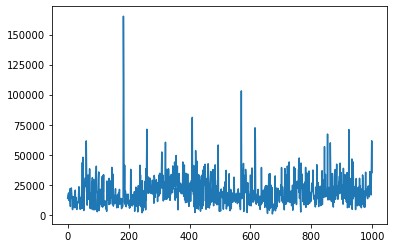

In [43]:
plt.plot(range(1000), TrafficCounts["total_passing_vehicle_volume"])
plt.show()